# Predicting the Survival of Titanic Passengers

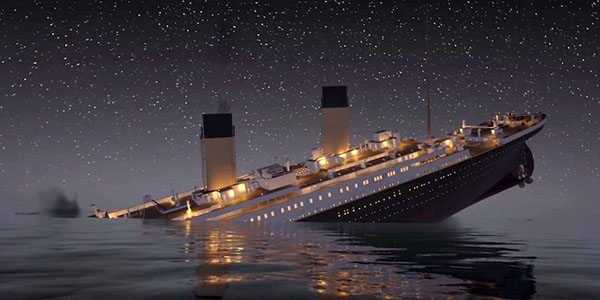

# 1. **Introduction**


> In this project, we are going to go through the popular Titanic dataset and try to predict whether a person survived the shipwreck. You can get this dataset from Kaggle.

The Goal: Predict whether a passenger survived or not. 0 for not surviving, 1 for surviving.



# 2.**Describing the data**


> 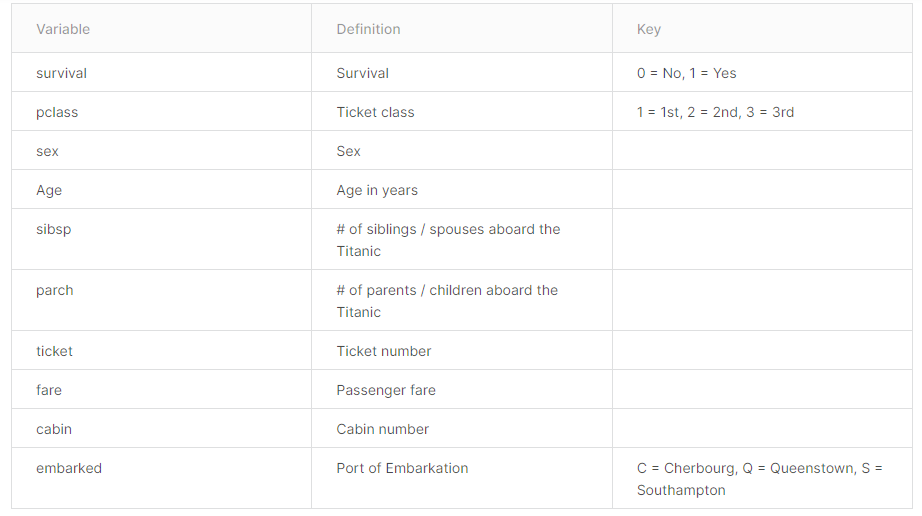


**pclass: A proxy for socio-economic status (SES)**

**1st = Upper**
**2nd = Middle**
**3rd = Lower**

**age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5**

**sibsp: The dataset defines family relations in this way...**

**Sibling = brother, sister, stepbrother, stepsister**

**Spouse = husband, wife (mistresses and fiancés were ignored)**

**parch: The dataset defines family relations in this way...**

**Parent = mother, father**

**Child = daughter, son, stepdaughter, stepson**

Some children travelled only with a nanny, therefore parch=0 for them.

# **Objective**


1.   **Introduction**
2.   **Describing the data**
3.   **Importing Libaries**
4.   **loading Datasets**
5.   **Data Exploration/Analysis**
6.   **Feature Engineering**
7.   **Modeling**
8.   **Conclusion**



In [1]:
#!cat -n train.csv

# 3.Importing the Libraries

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 4.Loading Datasets

In [3]:
#loading the datasets
data = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
test_id = test.PassengerId

#see the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#see the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


As we can see the test data has no Survived Columns

# 5.Data Exploration/Analysis

In [5]:
# count the number of rows and columns in data sets
print(data.shape)
print(test.shape)

(891, 12)
(418, 11)


there are 891 Rows and 12 Columns in traning data
and 418 Rows and 11 Columns in the test data

In [6]:
# Statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#to check how many null values are present in the data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## as we can the missing values are 177 'Age' , 'Cabin' 687 and 'Embarked' 2




0    549
1    342
Name: Survived, dtype: int64


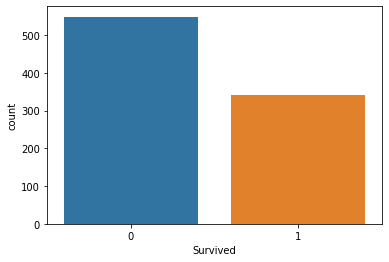

In [8]:
#number of people survived
sns.countplot(x=data['Survived'], data=data);
print(data['Survived'].value_counts())

*   0 means not Survived which is 549
*   1 means Survived which is 342

Visualize the count of surviver for the columns 'Pclass', 'Sex',	'Age', 'SibSp',	'Parch',	'Embarked'

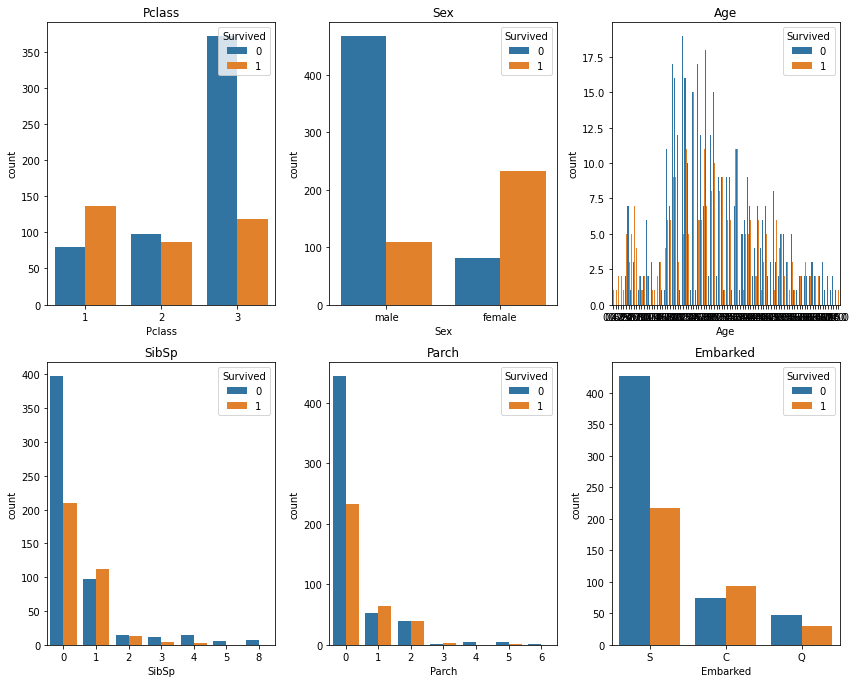

In [9]:
cols =['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

#the subplot grid and figuresizes of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows*6, n_cols*3.2))

#loop through each columns
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols+c # index to go through number of columns
    ax = axs[r][c] #Shows the position of subplot
    sns.countplot(x=data[cols[i]], hue=data['Survived'], ax=ax)#plot the graph
    ax.set_title(cols[i])
    ax.legend(title='Survived', loc='upper right')

plt.tight_layout()


In [10]:
#look at survival rate by sex
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
#look at survival rate by sex and Pclass
data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


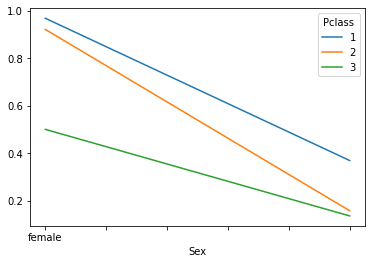

In [12]:
#visualize 
data.pivot_table('Survived', index='Sex', columns='Pclass').plot();

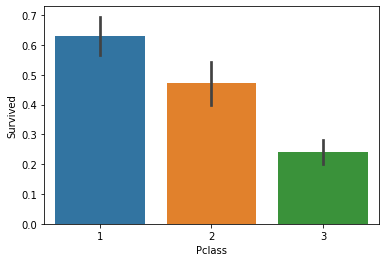

In [13]:
#visualizing on bar
sns.barplot(x='Pclass', y='Survived', data=data);

In [14]:
#survival rate by Pclass, age, sex
age = pd.cut(data['Age'], [0,18,80])
data.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

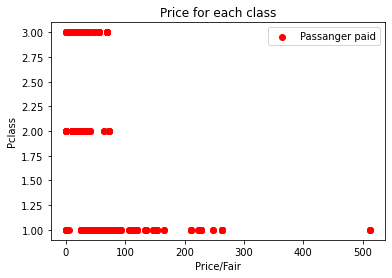

In [15]:
#plot the price paid for each class
plt.scatter(data['Fare'], data['Pclass'], color='red', label='Passanger paid')
plt.xlabel('Price/Fair')
plt.ylabel('Pclass')
plt.title('Price for each class')
plt.legend()
plt.show()

In [16]:
#finding the sum of the missing values on training data
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#finding the sum of the missing values on test data
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 6.Feature Engineering

In [18]:
#dealing with missing data <0.6
data['Age'] = data['Age'].mean()
data['Age'].fillna(value=data['Age'], inplace=True)

data['Embarked'].fillna(value='U', inplace=True)

#also in test data
test['Age'] = test['Age'].mean()
test['Age'].fillna(value=test['Age'], inplace=True)


In [19]:
# checking the missing values of training data
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [20]:
#checking the missing values of test data
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# we don't need 'PassengerId', 'Name', 'Ticket', 'Cabin' as its not relevant with the training

In [21]:
#Droping the columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1)


In [22]:
print(data.shape)
print(test.shape)

(891, 7)
(418, 6)


In [23]:
#data types
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [24]:
test.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [25]:
#print the unique value on training data
print(data['Sex'].unique())
print(data['Embarked'].unique())

#print the unique value on testing data
print(test['Sex'].unique())
print(test['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' 'U']
['male' 'female']
['Q' 'S' 'C']


In [26]:
#change the data into nemurical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#encode the sex columns
data.iloc[:, 2] = encoder.fit_transform(data.iloc[:, 2].values)
#on test
test.iloc[:, 1] = encoder.fit_transform(test.iloc[:, 1].values)


#encode the embarked columns
data.iloc[:, 6] = encoder.fit_transform(data.iloc[:, 6].values)
#on test
test.iloc[:, 5] = encoder.fit_transform(test.iloc[:, 5].values)

In [27]:
#print the unique value of traning data
print(data['Sex'].unique())
print(data['Embarked'].unique())

#print unique value of test data
print(test['Sex'].unique())
print(test['Embarked'].unique())

[1 0]
[2 0 1 3]
[1 0]
[1 2 0]


In [28]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked      int64
dtype: object

In [29]:
#spliting the data
from sklearn.model_selection import train_test_split
y = data['Survived']
X = data.drop('Survived', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
#scal the data
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_val = scal.transform (X_val)


# 7. **Modeling**

In [31]:
#Create machine learning models
def models(X_train,y_train):

  #1.Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,y_train)


  #2.Kneighbours
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
  knn.fit(X_train,y_train)

  #3.SCV(linear kernal)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel='linear', random_state=0)
  svc_lin.fit(X_train,y_train)

  #4.SCV(RBF kernal)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(X_train,y_train)

  #5.GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train,y_train)

  #6. Decisiontreeclassifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train,y_train)

  #7. randomforest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train,y_train)

  #print the traning accuracy
  print('[0]Logistic Regression Accuracy:', log.score(X_train,y_train))
  print('[1]K Neighbours Accuracy:', knn.score(X_train,y_train))
  print('[2]SVC Linear Accuracy:', svc_lin.score(X_train,y_train))
  print('[3]SVC RBF Accuracy:', svc_rbf.score(X_train,y_train))
  print('[4]Gaussian NB Accuracy:', gauss.score(X_train,y_train))
  print('[5]Decision Tree Accuracy:', tree.score(X_train,y_train))
  print('[6]Random Forest Accuracy:', forest.score(X_train,y_train))


  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [32]:
# training all models on traning data
#Training accuracy
model = models(X_train, y_train)


[0]Logistic Regression Accuracy: 0.797752808988764
[1]K Neighbours Accuracy: 0.8216292134831461
[2]SVC Linear Accuracy: 0.7879213483146067
[3]SVC RBF Accuracy: 0.8216292134831461
[4]Gaussian NB Accuracy: 0.7893258426966292
[5]Decision Tree Accuracy: 0.8426966292134831
[6]Random Forest Accuracy: 0.8412921348314607


# 8. **Conclusion**

In [33]:
# shows the confussion metrices and accuracy of all the model on test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(y_val, model[i].predict(X_val))

  #Extract TN,FP,FN,TP
  TN,FP,FN,TP = confusion_matrix(y_val, model[i].predict(X_val)).ravel()

  test_score = (TP+TN)/(TP+TN+FP+FN)

  print(cm)
  print('Model[{}] Testing accuracy = "{}"'.format(i, test_score))
  print()


[[82 23]
 [18 56]]
Model[0] Testing accuracy = "0.770949720670391"

[[92 13]
 [23 51]]
Model[1] Testing accuracy = "0.7988826815642458"

[[88 17]
 [22 52]]
Model[2] Testing accuracy = "0.7821229050279329"

[[95 10]
 [27 47]]
Model[3] Testing accuracy = "0.7932960893854749"

[[82 23]
 [18 56]]
Model[4] Testing accuracy = "0.770949720670391"

[[96  9]
 [27 47]]
Model[5] Testing accuracy = "0.7988826815642458"

[[92 13]
 [26 48]]
Model[6] Testing accuracy = "0.7821229050279329"



# model 5 i.e Decision Tree perform well on Training data giving accuracy of (0.8426966292134831) and test accuracy of ("0.7988826815642458")

In [34]:
submission_pred = model[5].predict(test)

In [35]:
df = pd.DataFrame({'PassengerId':test_id.values,
                   'Survived': submission_pred})
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


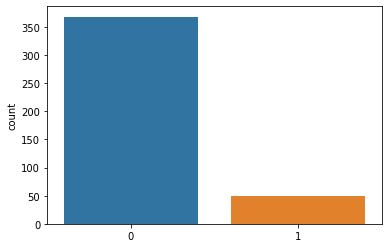

In [36]:
# result on test data
sns.countplot(x=submission_pred, data=test);

# As we can see model 5 which is Decision tree work better and give the result that more people have died compared to the survived one.

In [37]:
df.to_csv('submission.csv', index=False)